# CLUSTERING PRACTICAL

## ARTIN

## Mathieu Lagrange

reports are to be sent to [mathieu dot lagrange at ec-nantes dot fr] no later than a week after the lab

## Import tools

please import others if needed

In [21]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import make_blobs

## Data: generate a synthetic dataset

Generate a set of 100 points in a 2 dimensional space split into 4 non overlapping
clusters.

In [22]:
centers = [(10, 10), (10, 20), (20, 10), (20, 20)]
cluster_std = [0.8, 1, 0.7, 1.1]

X, true_label = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

Display the set with one color per cluster using the scatter function from matplotlib.pyplot

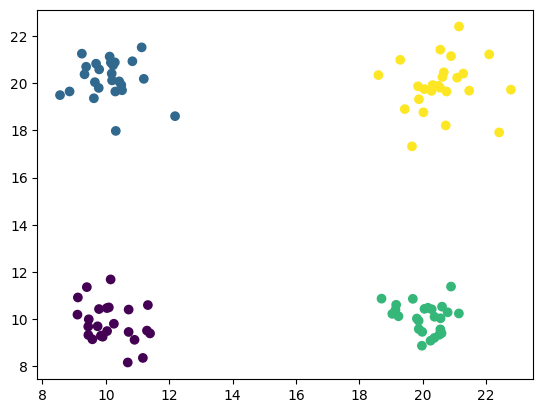

In [23]:
plt.scatter(X[:, 0],X[:, 1], c = true_label)

## Baseline: the random clustering algorithm

Cluster this dataset into k clusters by assigning a random integer value between 0 and k-1 to each point.

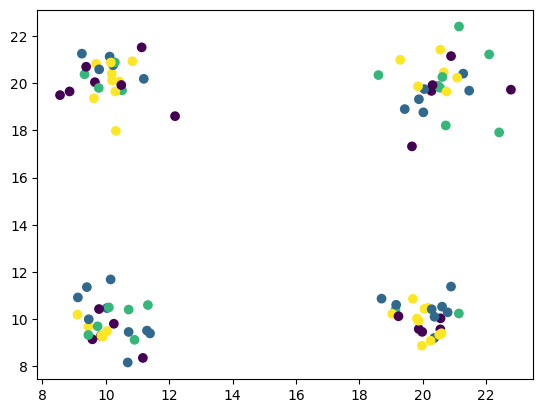

In [24]:
k = 4
random_predicted_cluster_labels = np.random.randint(0, k, size=len(X))

plt.scatter(X[:, 0], X[:, 1], c = random_predicted_cluster_labels)

## Metric: the rand index

Implement the rand index criterion (see https://en.wikipedia.org/wiki/Rand_index for reference)

In [25]:
import itertools

predicted = random_predicted_cluster_labels
ground_truth = true_label

def rand_index(predicted, ground_truth):
    a = 0
    b = 0
    
    n = len(ground_truth)
    
    pairs = []

    pairs = itertools.combinations(range(len(predicted)), 2)
    
    for pair in pairs:

        if (predicted[pair[0]] == predicted[pair[1]]) and (ground_truth[pair[0]] == ground_truth[pair[1]]):
            a += 1
        if (ground_truth[pair[0]] != ground_truth[pair[1]]) and (predicted[pair[0]] != predicted [pair[1]]):
            b += 1
            
    num = a + b
    den = n*(n-1)*0.5
    num/den
    return  num/den

print(rand_index(predicted, ground_truth))

0.6278787878787879


Compute the rand index between the reference clustering and 100 runs of the baseline algorithm.

In [26]:
rand_index_list = []

for i in range(100):
    predicted = np.random.randint(0, 3, 100)
    rand_index_list.append(rand_index(predicted, ground_truth))


Display results and compute the mean and standard deviation.

Mean =  0.5871474747474749
Std Deviation =  0.007529300246897983


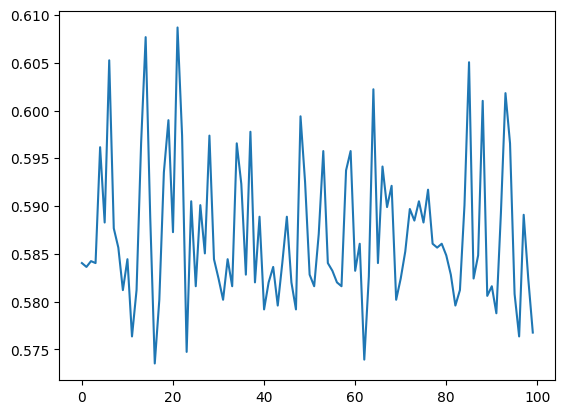

In [27]:
plt.figure()
plt.plot(range(0,len(rand_index_list)), rand_index_list)
plt.show

mean = sum(rand_index_list)/len(rand_index_list)
std = np.std(rand_index_list)

print("Mean = ", mean)
print("Std Deviation = ", std)

## Hierarchical Clustering

Compute the euclidean distance matrix using the pdist function from scipy.spatial.distance

In [28]:
from scipy.spatial.distance import pdist

euclidean_distance = pdist(X)


Display and interpret its shape

In [29]:
print(euclidean_distance)
euclidean_distance.shape

[14.48203075 10.78709322 10.30510507 ... 15.26845    11.25325784
 11.12706236]


(4950,)

We have n*(n-1)/2 rows which means we calculate all the distances of the unique pair of points. The diagonal is 0 because there is no distance between the same point. And also the matrix is symmetric

Compute the single link hierarchical clustering using the linkage function from scipy.cluster.hierarchy.

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkaged_cluster = linkage(X, metric = 'euclidean')

Display the corresponding dendrogram using the dendrogram function from scipy.cluster.hierarchy.

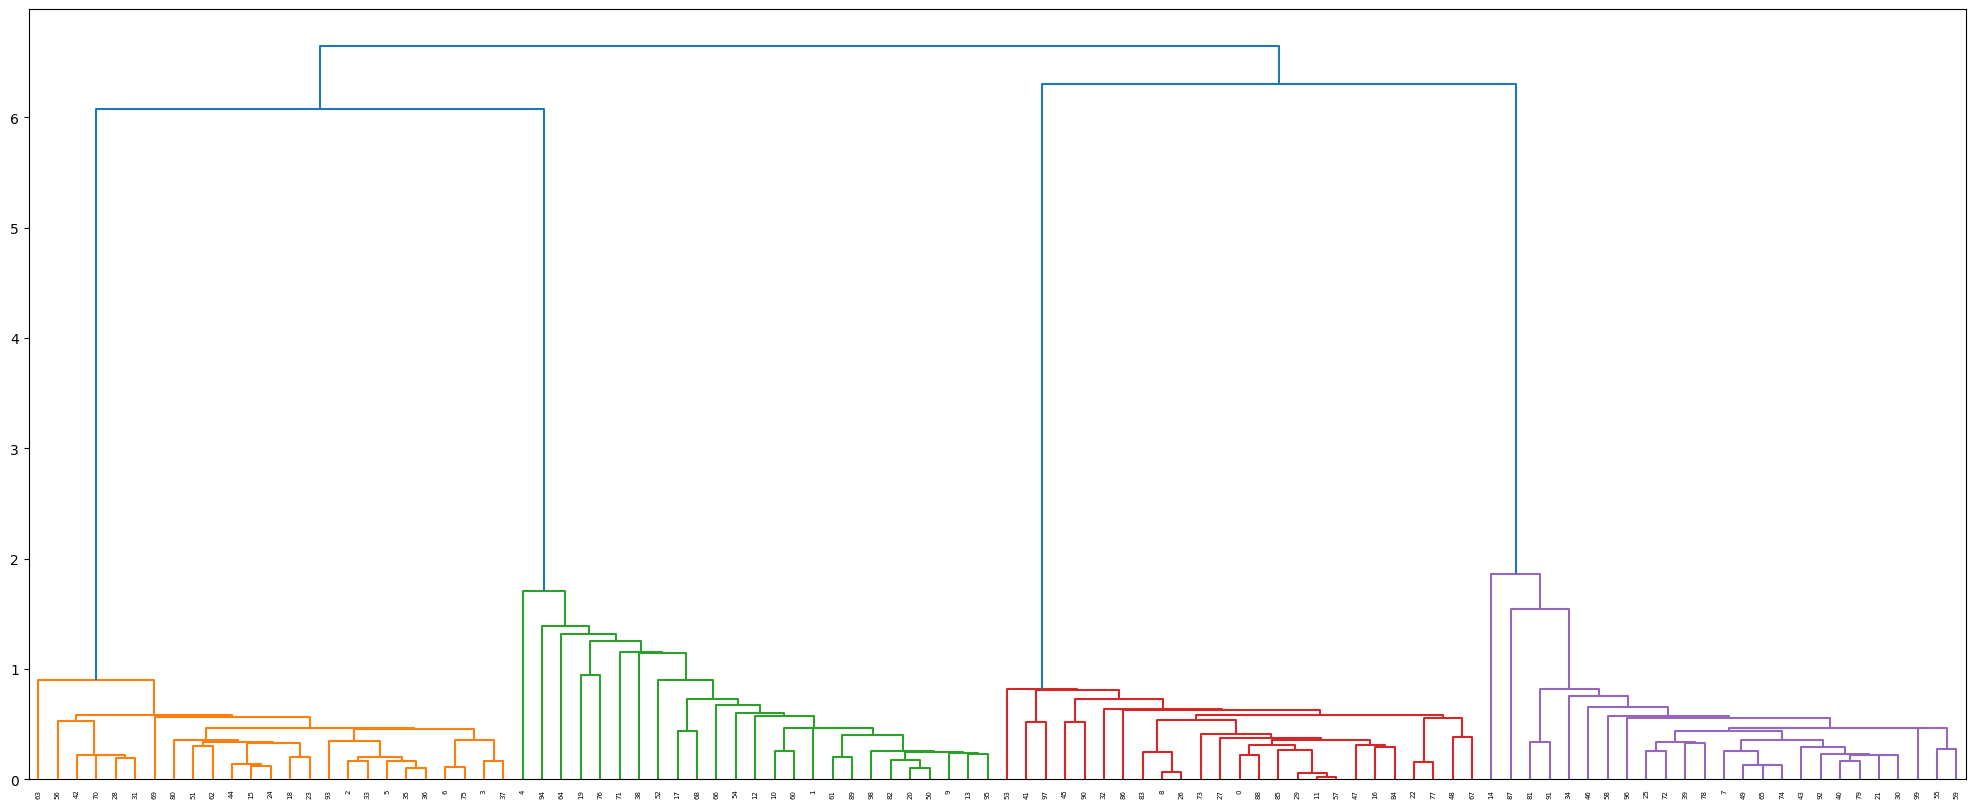

In [31]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkaged_cluster)
plt.show()

Implement a clustering algorithm that cuts the dendrogram in order to produce k clusters using the fcluster function from scipy.cluster.hierarchy.

In [32]:
from scipy.cluster.hierarchy import ward, fcluster

fcluster_cluster = fcluster(linkaged_cluster, t=4, criterion='maxclust')

print(fcluster_cluster)

[3 2 1 1 2 1 1 4 3 2 2 3 2 2 4 1 3 2 1 2 2 4 3 1 1 4 3 3 1 3 4 1 3 1 4 1 1
 1 2 4 4 3 1 4 1 3 4 3 3 4 2 1 2 3 2 4 1 3 4 4 2 2 1 1 2 4 2 3 2 1 1 2 4 3
 4 1 2 3 4 4 1 4 2 3 3 3 3 4 3 2 3 4 4 1 2 2 4 3 2 4]


Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [33]:
rand_index_list = []

for i in range(100):    
    linkaged_cluster = linkage(X, metric = 'euclidean')
    fcluster_cluster = fcluster(linkaged_cluster, t=4, criterion='maxclust')
    rand_index_list.append(rand_index(fcluster_cluster, ground_truth))
    

Display results and compute the mean and standard deviation.

In [34]:
print(rand_index_list)

mean = np.mean(rand_index_list)
std = np.std(rand_index_list)

print(mean, std)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0 0.0


Explain why the standard deviation is 0.

Because the method is determinisct there is no stochastisity thats why the std is equal to 0

## Partitional Clustering

Implement the k-means algorithm (see https://en.wikipedia.org/wiki/K-means_clustering section Standard algorithm for reference).

Hint: please consider the cdist function from scipy.spatial.distance to compute the distance of the points to the centroids.

In [77]:
from scipy.spatial.distance import cdist

k = 4 #Hyperparameter number of centers 

def Kmeans(dataset, k):

    centers = np.random.randint(30, size=(k, 2))

    distances = cdist(dataset, centers)

    pred_labels = []
    
    for distance in distances:
         nearest = min(distance)
         pred_labels.append(np.where(distance==nearest)[0][0])

    pred_labels.count(1)
    points_by_clusters = [[] for i in range(k)]
    for i in range(k):
        temp_points = []
        for index, point in enumerate(dataset): 
            
            if (pred_labels[index] == i):
                temp_points.append(dataset[index])
        
        points_by_clusters[i] = temp_points
        print(np.mean(points_by_clusters[i], axis=0))

    return pred_labels, np.array(centers)

    
         

kmean_labels, centers = Kmeans(X, k)
print(kmean_labels)

# plt.scatter(X[:,0], X[:, 1], c = kmean_labels)
# plt.scatter(centers[:, 0], centers [:, 1], color = 'red')
# plt.show()



[20.32886741 14.97341753]
[ 9.39117419 20.20933616]
[10.30235693 13.70535132]
nan
[2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1]


Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [ ]:
from sklearn.cluster import KMeans


rand_index_list = []
def rand_index_kmeans(ground_truth, k, X):
    for i in range(100):
        kmeans_clustering = KMeans(n_clusters=k).fit(X).labels_

        rand_index_list.append(rand_index(kmeans_clustering, ground_truth))
    return rand_index_list
        
        

Display results and compute the mean and standard deviation.

In [ ]:
print(rand_index_list)

[]


## Performance Analysis

Display the performance of the 3 clustering algorithms on the synthetic dataset using the bar function from matplotlib.pyplot.

Load the iris dataset using the load_iris function from scikit-learn and perform the same performance analysis using this dataset.

Load the Breast cancer wisconsin (diagnostic) dataset dataset using the load_breast_cancer function from scikit-learn and perform the same performance analysis using this dataset.

## [Bonus] Determining the number of clusters

Implement the gap statistic method for determining the optimal number of clusters for the 3 datasets.


Discuss the results.

answer here.